# All the Code I used to do my pre-processing. Below is how I insured that I had the proper extensions necessary to make sure that data that I imported was done correctly.

In [30]:
!pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [63]:
import pandas as pd

## Below I imported the vgsales.csv (video game sales) and used the df.head() function to ensure that the beginning data worked through the importation of it to Juypter.

In [65]:
df = pd.read_csv("vgsales.csv")

In [67]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Basic info about variable types and column names that the dataset has.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Below is the commands to check the amount of cells in the data that have null types. There are some in the year and publisher, but based on what Im trying to show with the data, I decided not too mess with them currently.

In [71]:
dataclean_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Global_Sales      0
dtype: int64

## Checking if there are duplicates in the data which there is not.

In [73]:
print("There are", dataclean_df.duplicated().sum(), "of duplicates found in the data")

There are 0 of duplicates found in the data


## I created a bar chart showing the difference in amount of sales by each of the companies throughout the regions (US, EU, JP, Other). This is an easy graph that shows the comparison that some companies obviously have a different amount of expertise and games available to different areas in the world.

In [77]:
import matplotlib.pyplot as plt

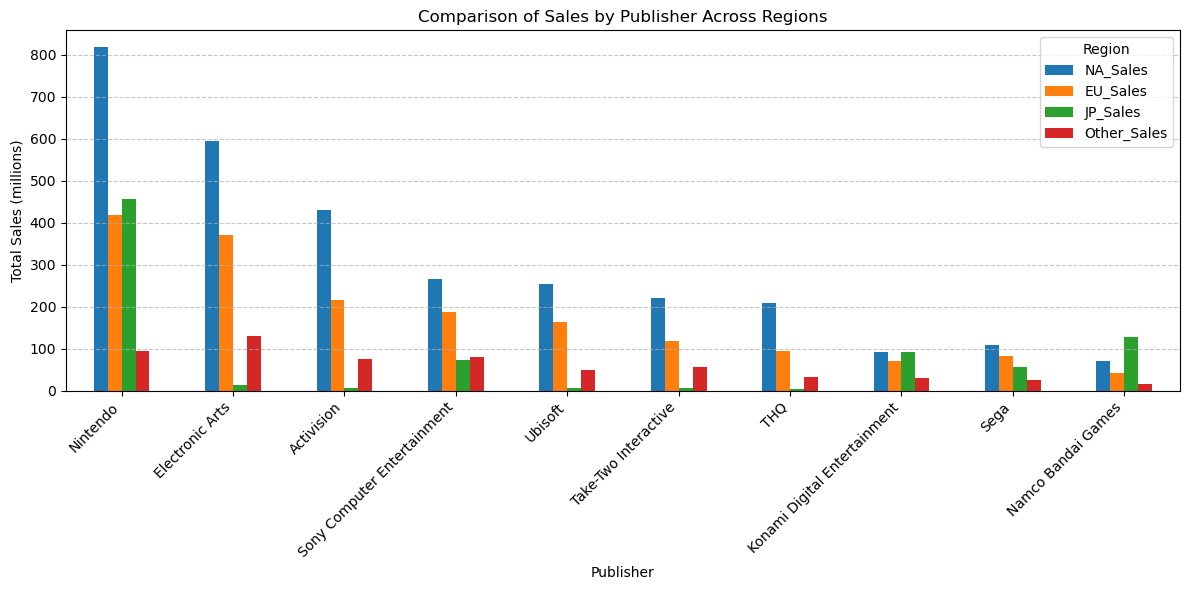

In [82]:
sales_by_publisher = df.groupby("Publisher")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

top_publishers = sales_by_publisher.sum(axis=1).nlargest(10).index
sales_by_publisher = sales_by_publisher.loc[top_publishers]

ax = sales_by_publisher.plot(kind="bar", figsize=(12, 6))

plt.title("Comparison of Sales by Publisher Across Regions")
plt.xlabel("Publisher")
plt.ylabel("Total Sales (millions)")
plt.xticks(rotation=45, ha='right')  
plt.legend(title="Region") 
plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.tight_layout() 

plt.show()

## a